<a href="https://colab.research.google.com/github/youngsuk5/ML/blob/main/Linear/California.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 캘리포니아 주택 가격 데이터

| 속성 | 설명 |
|------|------|
| MedInc | 블록의 중간 소득 |
| HouseAge | 블록의 중간 주택 연도 |
| AveRooms | 평균 방 수 |
| AveBedrms | 평균 침실 수 |
| Population |블록 내 거주중인 인구수 |
| AveOccup | 평균 주택점유율 |
| Latitude | 주택 블록 위도 |
| Longitude | 주택 블록 경도 |

In [8]:
import numpy as np
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
print(california.keys())
print(california.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the 

In [9]:
import pandas as pd

california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['Target'] = california.target
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


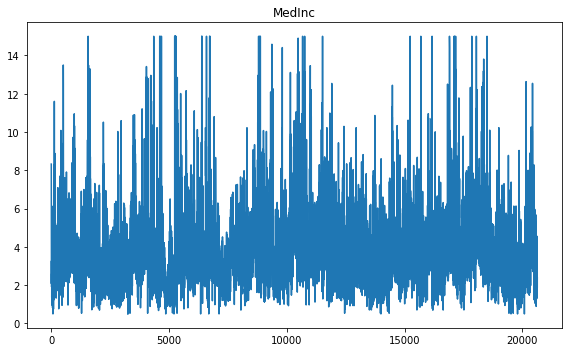

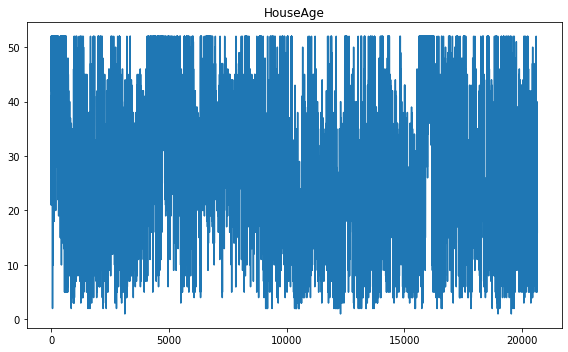

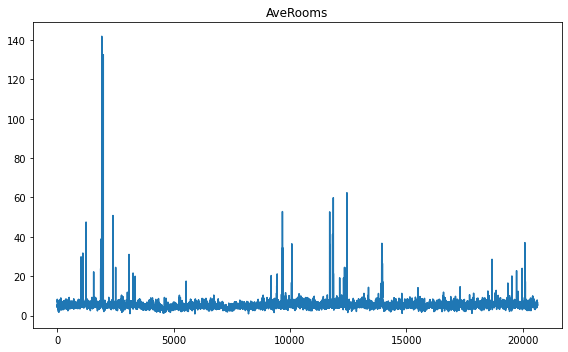

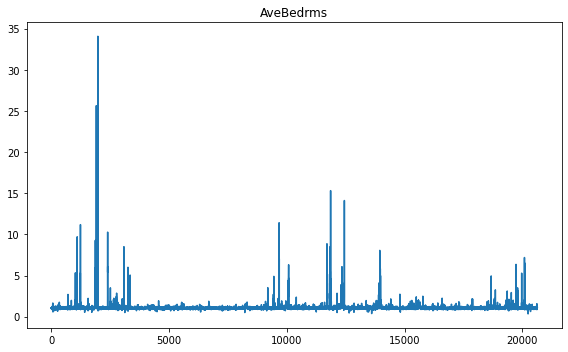

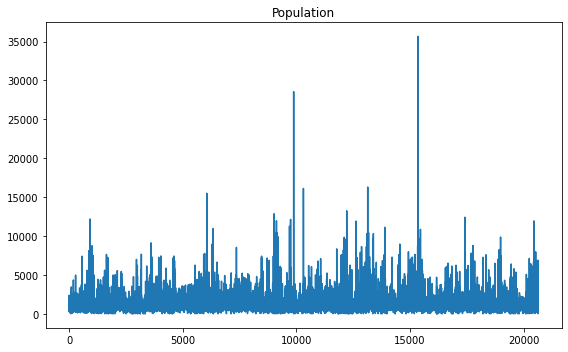

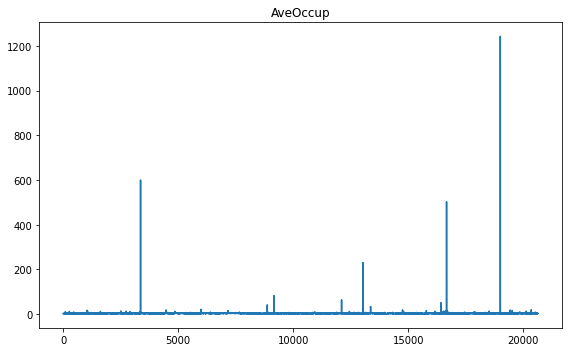

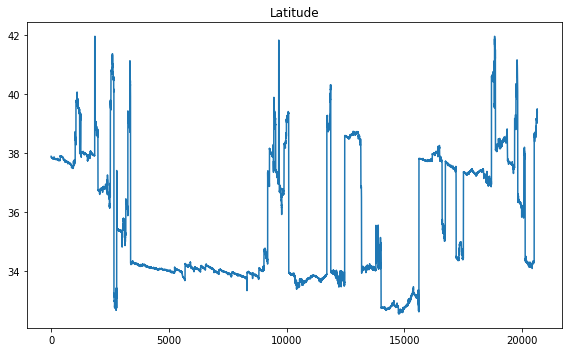

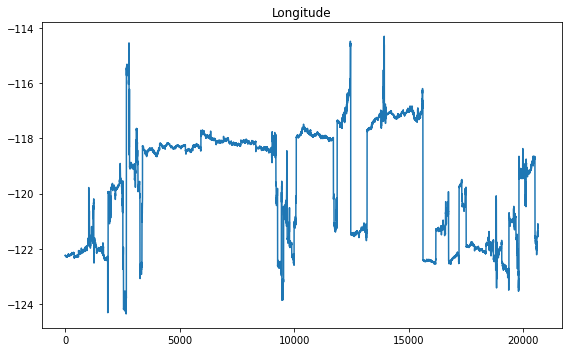

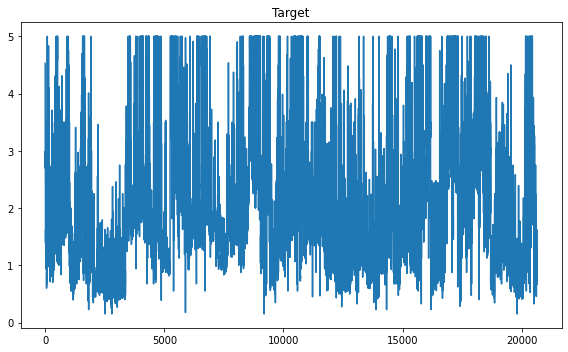

In [ ]:
import matplotlib.pyplot as plt

for i, col in enumerate(california_df.columns):
  plt.figure(figsize=(8,5))
  plt.plot(california_df[col])
  plt.title(col)
  plt.tight_layout()

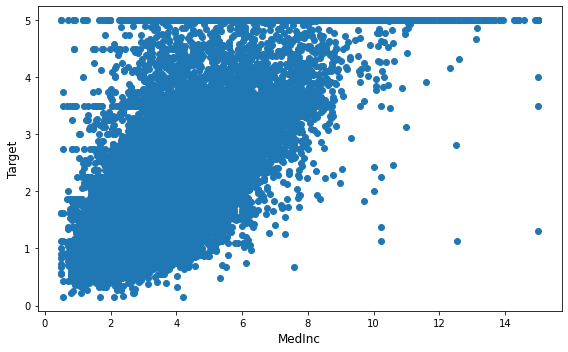

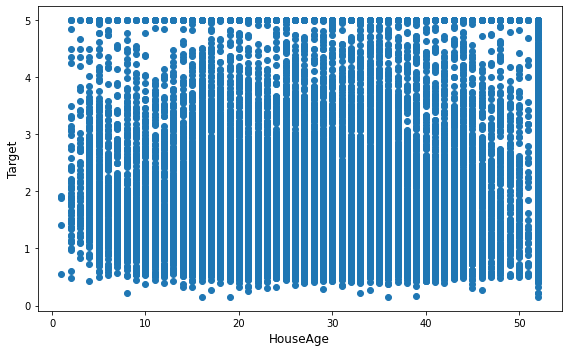

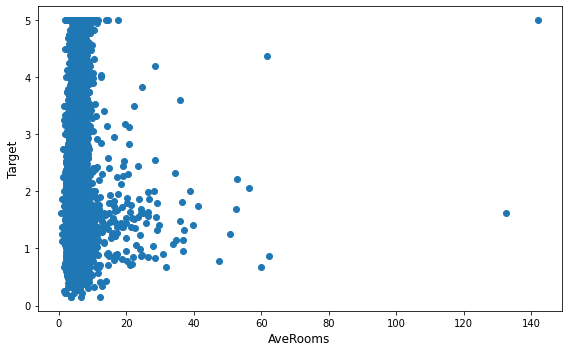

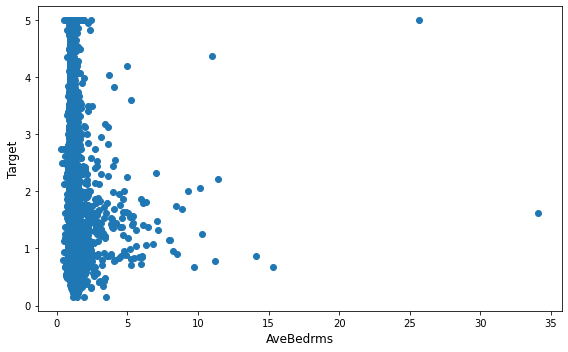

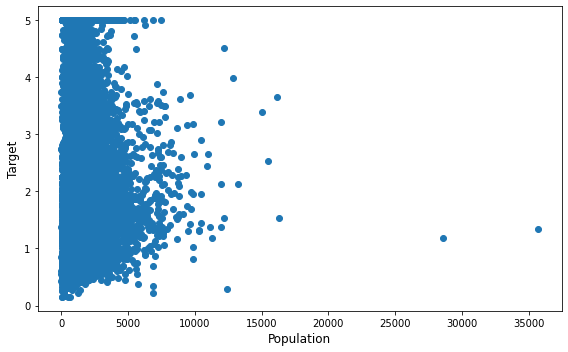

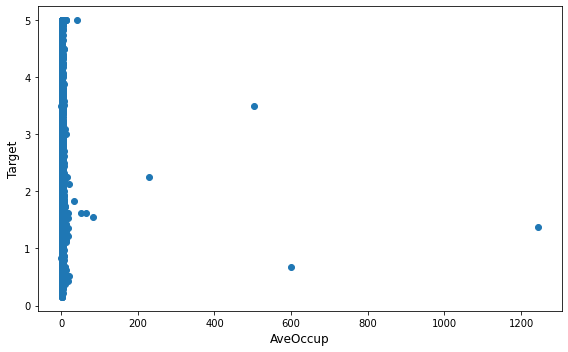

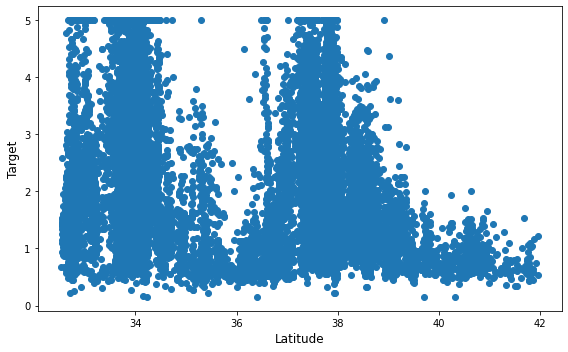

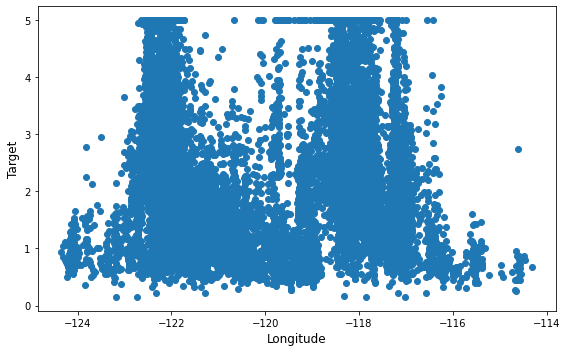

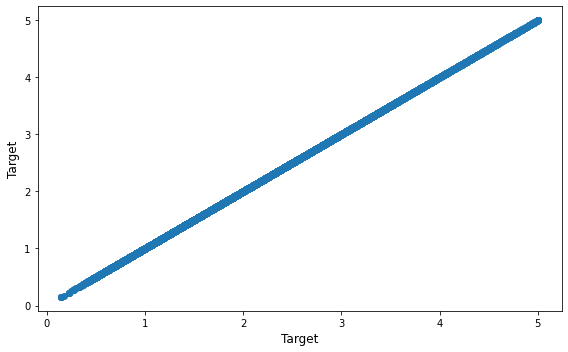

In [ ]:
for i, col in enumerate(california_df.columns):
  plt.figure(figsize=(8,5))
  plt.scatter(california_df[col], california_df['Target'])
  plt.ylabel('Target', size=12)
  plt.xlabel(col, size=12)
  plt.tight_layout()

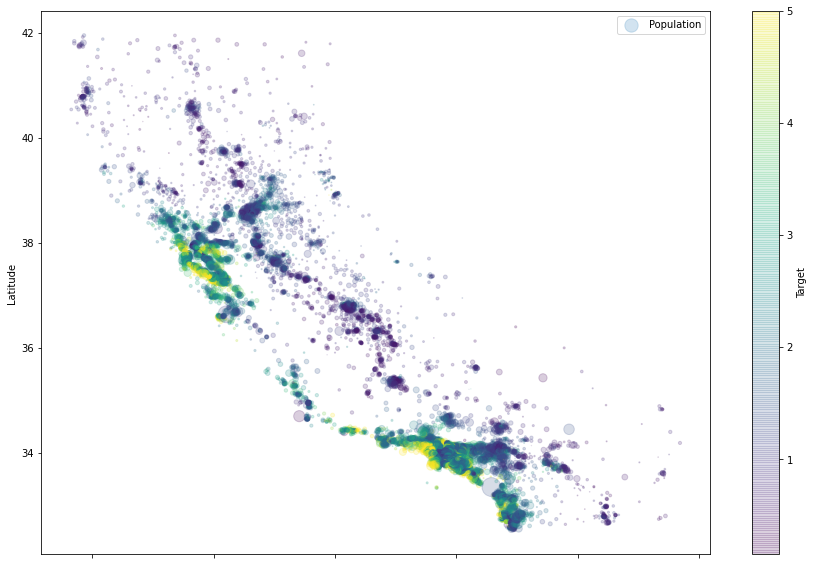

In [5]:
import matplotlib.pyplot as plt
california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2,
                   s=california_df['Population']/100, label='Population', figsize=(15,10),
                   c='Target', cmap=plt.get_cmap('viridis'), colorbar=True)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

model = LinearRegression(normalize=True)

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

model.fit(X_train, y_train)
print('학습 데이터 점수:',model.score(X_train, y_train))
print('평가 데이터 점수:',model.score(X_test, y_test))

scores = cross_val_score(model, california.data, california.target, cv =10, scoring='neg_mean_squared_error')
print('NMSE mean:',scores.mean())
print('NMSE std:',scores.std())

r2_scores = cross_val_score(model, california.data, california.target, cv =10, scoring='r2')
print('r2 mean:',r2_scores.mean())
print('r2 std:',r2_scores.std())

학습 데이터 점수: 0.6041341499292556
평가 데이터 점수: 0.6137623197176886
NMSE mean: -0.5509524296956642
NMSE std: 0.19288582953865108
r2 mean: 0.5110068610523768
r2 std: 0.059288613712624005


In [15]:
from sklearn.metrics import mean_squared_error, r2_score

pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test,pred)))
r2 = r2_score(y_test, pred)

print('RMSE :', rmse)
print('r2 :', r2)

RMSE : 0.7299835536796975
r2 : 0.6137623197176886


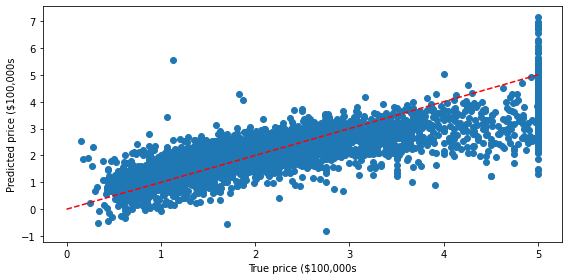

In [19]:
 def plot_california_prices(expected, predicted):
   plt.figure(figsize=(8, 4))
   plt.scatter(expected, predicted)
   plt.plot([0, 5], [0, 5], '--r')
   plt.xlabel('True price ($100,000s')
   plt.ylabel('Predicted price ($100,000s')
   plt.tight_layout()

predicted = model.predict(X_test)
expected = y_test
plot_california_prices(expected, predicted)